In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
from google.colab import files
uploaded = files.upload()

Saving PM_train.txt to PM_train.txt


In [4]:
train_df = pd.read_csv('PM_train.txt', sep=" ", header=None).iloc[:, :26]
train_df.columns = [
    'id',
    'cycle',
    'setting1',
    'setting2',
    'setting3',
    'T2_FanInletTemp_°R',
    'T24_LPCOutletTemp_°R',
    'T30_HPCOutletTemp_°R',
    'T50_LPTOutletTemp_°R',
    'P2_FanInletPressure_psia',
    'P15_BypassDuctPressure_psia',
    'P30_HPCOutletPressure_psia',
    'Nf_FanSpeed_rpm',
    'Nc_CoreSpeed_rpm',
    'epr_EnginePressureRatio',
    'Ps30_HPCOutletStaticPressure_psia',
    'phi_FuelFlowRatio_pps_psi',
    'NRf_CorrectedFanSpeed_rpm',
    'NRc_CorrectedCoreSpeed_rpm',
    'BPR_BypassRatio',
    'farB_BurnerFuelAirRatio',
    'htBleed_BleedEnthalpy',
    'Nf_dmd_DemandedFanSpeed_rpm',
    'PCNfR_dmd_DemandedCorrectedFanSpeed_rpm',
    'W31_HPTCoolantBleed_lbm_s',
    'W32_LPTCoolantBleed_lbm_s'
]



analysing process

In [5]:
train_df.head()

,id,cycle,setting1,setting2,setting3,T2_FanInletTemp_°R,T24_LPCOutletTemp_°R,T30_HPCOutletTemp_°R,T50_LPTOutletTemp_°R,P2_FanInletPressure_psia,...,phi_FuelFlowRatio_pps_psi,NRf_CorrectedFanSpeed_rpm,NRc_CorrectedCoreSpeed_rpm,BPR_BypassRatio,farB_BurnerFuelAirRatio,htBleed_BleedEnthalpy,Nf_dmd_DemandedFanSpeed_rpm,PCNfR_dmd_DemandedCorrectedFanSpeed_rpm,W31_HPTCoolantBleed_lbm_s,W32_LPTCoolantBleed_lbm_s
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


the first 5 rows of your dataset to ensure everything looks correct and it gives you a better understanding

In [6]:
up=files.upload()

Saving PM_test.txt to PM_test.txt


In [7]:
test_df = pd.read_csv('PM_test.txt', sep=" ", header=None).iloc[:, :26]
test_df.columns = train_df.columns

The first part of the code loads the PM_test.txt file, selects the first 26 columns ignoring any extra columns, and assigns those columns to a DataFrame test_df.
The second part ensures that the column names of test_df are exactly the same as those of train_df, so both datasets (training and testing) have matching structures.

In [8]:
test_df.head()

,id,cycle,setting1,setting2,setting3,T2_FanInletTemp_°R,T24_LPCOutletTemp_°R,T30_HPCOutletTemp_°R,T50_LPTOutletTemp_°R,P2_FanInletPressure_psia,...,phi_FuelFlowRatio_pps_psi,NRf_CorrectedFanSpeed_rpm,NRc_CorrectedCoreSpeed_rpm,BPR_BypassRatio,farB_BurnerFuelAirRatio,htBleed_BleedEnthalpy,Nf_dmd_DemandedFanSpeed_rpm,PCNfR_dmd_DemandedCorrectedFanSpeed_rpm,W31_HPTCoolantBleed_lbm_s,W32_LPTCoolantBleed_lbm_s
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


head() returns the first 5 rows of the DataFrame, which allows you to quickly inspect the data and ensure it's in the expected format

In [9]:
upload=files.upload()

Saving PM_truth.txt to PM_truth.txt


In [10]:
truth_df = pd.read_csv('PM_truth.txt', sep=" ", header=None).iloc[:, :1]

iloc[:, :1] then selects only the first column of the data

In [11]:
truth_df.head()

,0
0,112
1,98
2,69
3,82
4,91


the first 5 rows of truth_df, which will contain the ground truth values from PM_truth.txt

In [12]:
train_df['RUL'] = train_df.groupby('id')['cycle'].transform('max') - train_df['cycle']
train_df

,id,cycle,setting1,setting2,setting3,T2_FanInletTemp_°R,T24_LPCOutletTemp_°R,T30_HPCOutletTemp_°R,T50_LPTOutletTemp_°R,P2_FanInletPressure_psia,...,NRf_CorrectedFanSpeed_rpm,NRc_CorrectedCoreSpeed_rpm,BPR_BypassRatio,farB_BurnerFuelAirRatio,htBleed_BleedEnthalpy,Nf_dmd_DemandedFanSpeed_rpm,PCNfR_dmd_DemandedCorrectedFanSpeed_rpm,W31_HPTCoolantBleed_lbm_s,W32_LPTCoolantBleed_lbm_s,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


calculates the Remaining Useful Life (RUL) for each observation in the dataset

In [13]:
scaler = MinMaxScaler()
train_df.iloc[:, 2:25] = scaler.fit_transform(train_df.iloc[:, 2:25])
train_df.head()

<ipython-input-13-a507ba427244>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.33333333 0.33333333 0.16666667 ... 0.83333333 0.58333333 0.66666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df.iloc[:, 2:25] = scaler.fit_transform(train_df.iloc[:, 2:25])


,id,cycle,setting1,setting2,setting3,T2_FanInletTemp_°R,T24_LPCOutletTemp_°R,T30_HPCOutletTemp_°R,T50_LPTOutletTemp_°R,P2_FanInletPressure_psia,...,NRf_CorrectedFanSpeed_rpm,NRc_CorrectedCoreSpeed_rpm,BPR_BypassRatio,farB_BurnerFuelAirRatio,htBleed_BleedEnthalpy,Nf_dmd_DemandedFanSpeed_rpm,PCNfR_dmd_DemandedCorrectedFanSpeed_rpm,W31_HPTCoolantBleed_lbm_s,W32_LPTCoolantBleed_lbm_s,RUL
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.205882,0.199608,0.363986,0.0,0.333333,0,0.0,0.713178,23.4190,191
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.279412,0.162813,0.411312,0.0,0.333333,0,0.0,0.666667,23.4236,190
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.220588,0.171793,0.357445,0.0,0.166667,0,0.0,0.627907,23.3442,189
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.294118,0.174889,0.166603,0.0,0.333333,0,0.0,0.573643,23.3739,188
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.235294,0.174734,0.402078,0.0,0.416667,0,0.0,0.589147,23.4044,187


making them easier to work with and improving the performance of many machine learning algorithms

to scale feature columns specified range, typically [0, 1] ensures that all the feature values are on the same scale

In [14]:
test_df['max_cycle'] = test_df.groupby('id')['cycle'].transform('max')
truth_df['id'] = truth_df.index + 1
truth_df.columns = ['RUL','id']
test_df = test_df.merge(truth_df, on='id', how='left')
test_df['RUL'] = test_df['RUL'] + (test_df['max_cycle'] - test_df['cycle'])
test_df.drop('max_cycle', axis=1, inplace=True)
test_df.iloc[:, 2:25] = scaler.transform(test_df.iloc[:, 2:25])


<ipython-input-14-ab430f6c385a>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.33333333 0.41666667 0.41666667 ... 0.58333333 0.58333333 0.66666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test_df.iloc[:, 2:25] = scaler.transform(test_df.iloc[:, 2:25])


test_df will be ready for use in predictive modeling, with the correct RUL values and appropriately scaled feature values

In [15]:
test_df.head()

,id,cycle,setting1,setting2,setting3,T2_FanInletTemp_°R,T24_LPCOutletTemp_°R,T30_HPCOutletTemp_°R,T50_LPTOutletTemp_°R,P2_FanInletPressure_psia,...,NRf_CorrectedFanSpeed_rpm,NRc_CorrectedCoreSpeed_rpm,BPR_BypassRatio,farB_BurnerFuelAirRatio,htBleed_BleedEnthalpy,Nf_dmd_DemandedFanSpeed_rpm,PCNfR_dmd_DemandedCorrectedFanSpeed_rpm,W31_HPTCoolantBleed_lbm_s,W32_LPTCoolantBleed_lbm_s,RUL
0,1,1,0.632184,0.750000,0.0,0.0,0.545181,0.310661,0.269413,0.0,...,0.220588,0.132160,0.308965,0.0,0.333333,0,0.0,0.558140,23.3735,142
1,1,2,0.344828,0.250000,0.0,0.0,0.150602,0.379551,0.222316,0.0,...,0.264706,0.204768,0.213159,0.0,0.416667,0,0.0,0.682171,23.3916,141
2,1,3,0.517241,0.583333,0.0,0.0,0.376506,0.346632,0.322248,0.0,...,0.220588,0.155640,0.458638,0.0,0.416667,0,0.0,0.728682,23.4166,140
3,1,4,0.741379,0.500000,0.0,0.0,0.370482,0.285154,0.408001,0.0,...,0.250000,0.170090,0.257022,0.0,0.250000,0,0.0,0.666667,23.3737,139
4,1,5,0.580460,0.500000,0.0,0.0,0.391566,0.352082,0.332039,0.0,...,0.220588,0.152751,0.300885,0.0,0.166667,0,0.0,0.658915,23.4130,138


In [16]:
truth_df.head()

,RUL,id
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5


In [17]:
train_df.corr()

,id,cycle,setting1,setting2,setting3,T2_FanInletTemp_°R,T24_LPCOutletTemp_°R,T30_HPCOutletTemp_°R,T50_LPTOutletTemp_°R,P2_FanInletPressure_psia,...,NRf_CorrectedFanSpeed_rpm,NRc_CorrectedCoreSpeed_rpm,BPR_BypassRatio,farB_BurnerFuelAirRatio,htBleed_BleedEnthalpy,Nf_dmd_DemandedFanSpeed_rpm,PCNfR_dmd_DemandedCorrectedFanSpeed_rpm,W31_HPTCoolantBleed_lbm_s,W32_LPTCoolantBleed_lbm_s,RUL
id,1.000000,0.078753,-0.017895,-0.006197,NaN,NaN,0.014133,0.012621,0.026116,NaN,...,0.044230,-0.059473,0.022486,NaN,0.013513,NaN,NaN,-0.020589,-0.016465,0.078753
cycle,0.078753,1.000000,-0.004527,0.016132,NaN,NaN,0.549898,0.543947,0.624577,NaN,...,0.477523,0.370324,0.588676,NaN,0.566995,NaN,NaN,-0.583597,-0.585923,-0.736241
setting1,-0.017895,-0.004527,1.000000,0.011660,NaN,NaN,0.009030,-0.005651,0.009544,NaN,...,0.002318,-0.004469,0.007652,NaN,0.002599,NaN,NaN,-0.005713,-0.014559,-0.003198
setting2,-0.006197,0.016132,0.011660,1.000000,NaN,NaN,0.007266,0.009068,0.014673,NaN,...,0.018156,-0.006310,0.014156,NaN,0.012280,NaN,NaN,-0.010554,-0.007846,-0.001948
setting3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T2_FanInletTemp_°R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T24_LPCOutletTemp_°R,0.014133,0.549898,0.009030,0.007266,NaN,NaN,1.000000,0.602610,0.714949,NaN,...,0.661792,0.179752,0.675975,NaN,0.629886,NaN,NaN,-0.661841,-0.668050,-0.606484
T30_HPCOutletTemp_°R,0.012621,0.543947,-0.005651,0.009068,NaN,NaN,0.602610,1.000000,0.678413,NaN,...,0.600963,0.237137,0.639921,NaN,0.600017,NaN,NaN,-0.625941,-0.633901,-0.584520
T50_LPTOutletTemp_°R,0.026116,0.624577,0.009544,0.014673,NaN,NaN,0.714949,0.678413,1.000000,NaN,...,0.745158,0.190748,0.758459,NaN,0.703499,NaN,NaN,-0.748067,-0.745193,-0.678948
P2_FanInletPressure_psia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


all numerical columns in the DataFrame train_df, showing the linear relationships between them

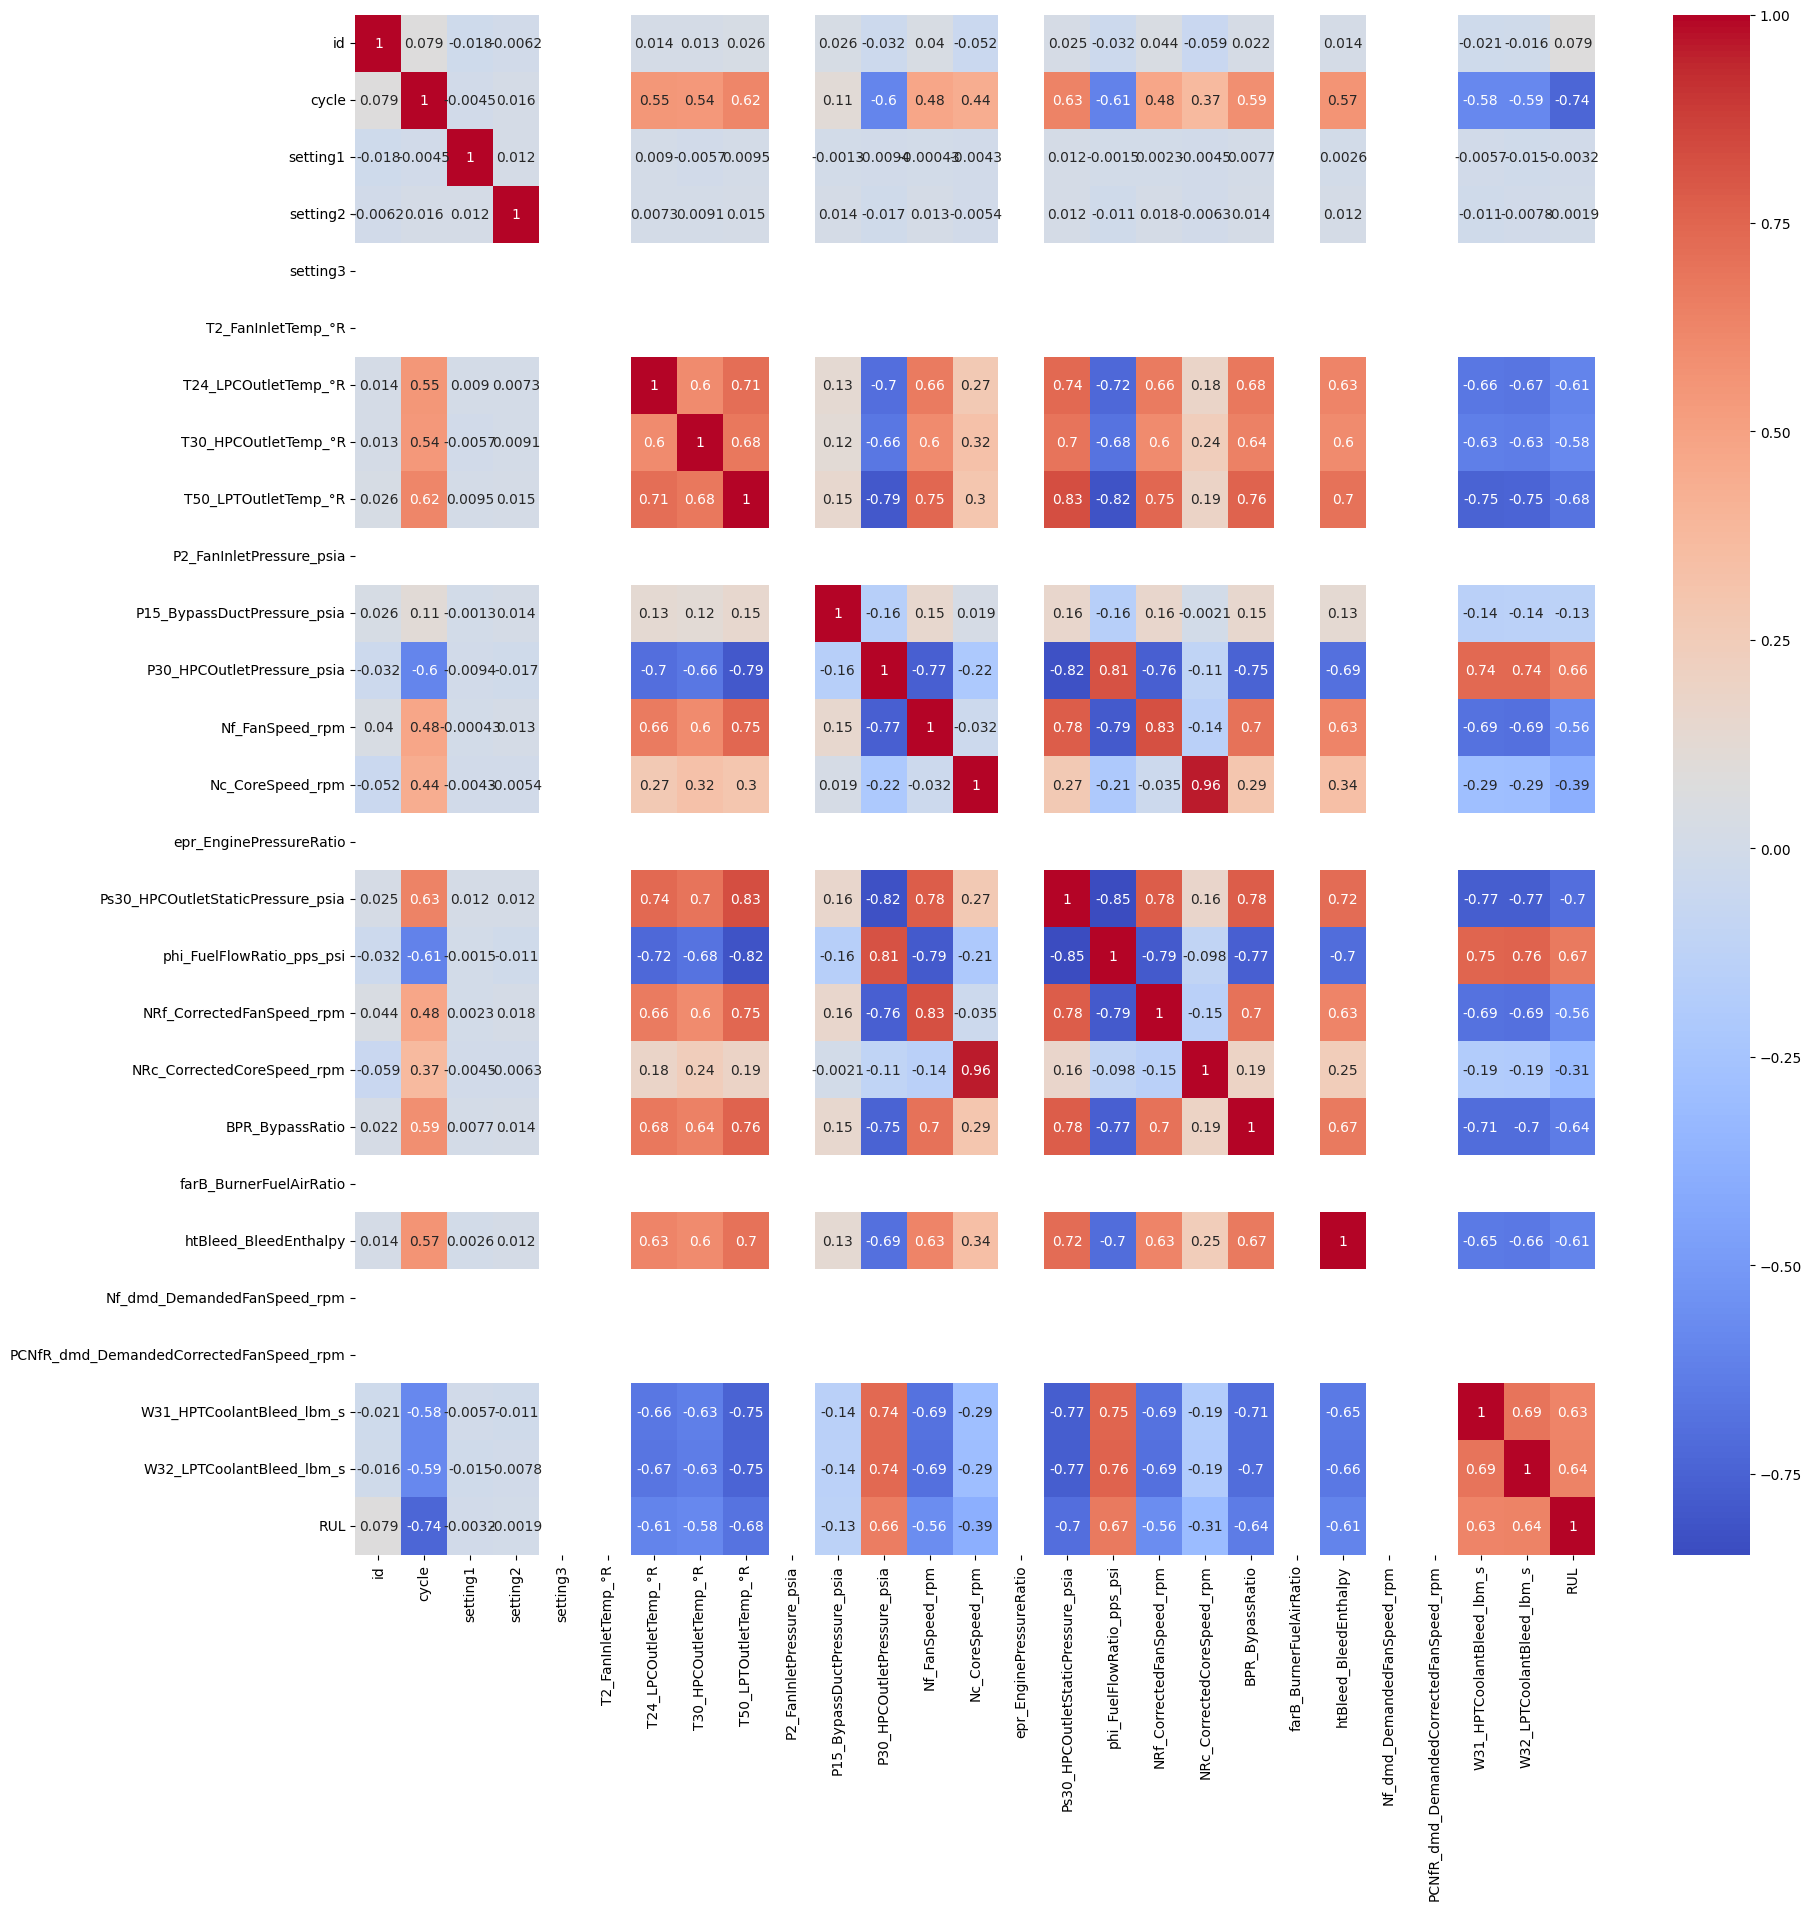

In [18]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', ax=ax)
plt.show()

correlation between each pair of features(heat map)

In [19]:
sequence_cols = train_df.columns[2:25]
seq_length = 50

In [20]:
x_train1 = train_df.drop(['RUL','setting1','setting2','setting3'], axis=1)
y_train1 = train_df['RUL']

In [21]:
from xgboost import XGBRegressor

In [38]:
model1= XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model1.fit(x_train1, y_train1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model1.predict(x_train1)
mse = mean_squared_error(y_train1, y_pred)
r2 = r2_score(y_train1, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 94.80161255059227
R-squared: 0.9800180196762085


In [40]:
y_pred = model1.predict(x_test1)

In [41]:
y_pred

array([196.7744  , 194.30806 , 191.91455 , ...,  24.394838,  20.781664,
        18.81144 ], dtype=float32)

In [22]:
from sklearn.ensemble import RandomForestRegressor


In [23]:
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(x_train1, y_train1)

RandomForestRegressor(n_estimators=10, random_state=42)

In [24]:
y_pred = model.predict(x_train1)

In [25]:
y_pred

array([1.879e+02, 1.890e+02, 1.892e+02, ..., 5.800e+00, 1.600e+00,
       1.000e-01])

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(x_train1)
mse = mean_squared_error(y_train1, y_pred)
r2 = r2_score(y_train1, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 45.852034801997
R-squared: 0.9903354663764004


In [32]:
x_test1 = test_df.drop(['RUL','setting1','setting2','setting3'], axis=1)
y_test1 = test_df['RUL']

In [28]:
y_pred1 = model.predict(x_test1)

In [29]:
y_pred1

array([199.6, 180.2, 191.5, ...,  22.6,  21.3,  16.2])

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [ 200, 300],
    'max_depth': [ 20, None]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train1, y_train1)

best_model = grid_search.best_estimator_


In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, x_train1, y_train1, scoring='r2', cv=5)
print("Cross-validated R² scores:", scores)
print("Average R²:", scores.mean())

Cross-validated R² scores: [0.56826749 0.71408413 0.63258218 0.36118938 0.56782709]
Average R²: 0.5687900558778268


Generate sequences of sensor data and predicting the sequence

input features

will be used to evaluate the performance of the trained machine learning model
model will make predictions based on X_test and compare those predictions to the true values in y_test.

First LSTM layer with 100 units, processing sequences of sensor data, and returning a sequence of outputs


predicting the sensor data

In [45]:
y_pred1 = best_model.predict(x_test1)

In [46]:
mse = mean_squared_error(y_test1, y_pred1)
r2 = r2_score(y_test1, y_pred1)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2711.024243707769
R-squared: 0.22060906819019144


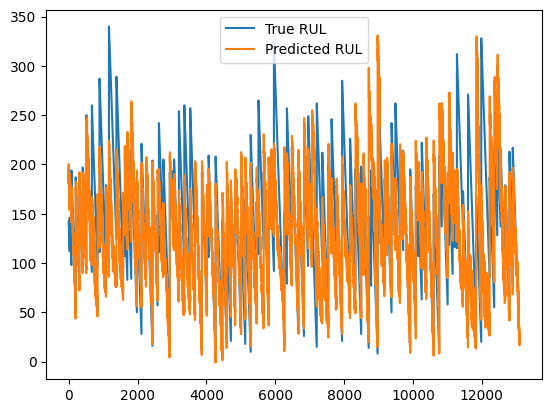

In [48]:
plt.plot(y_test1, label='True RUL')
plt.plot(y_pred, label='Predicted RUL')
plt.legend()
plt.show()

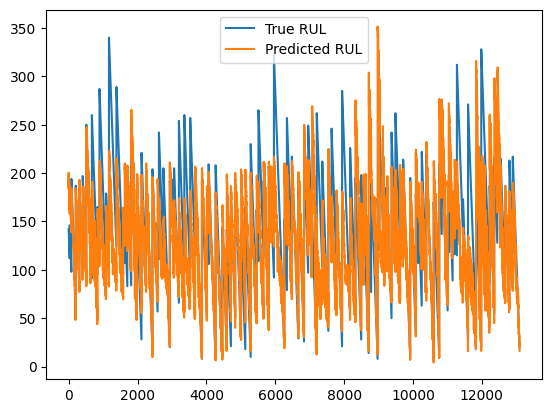

In [47]:

plt.plot(y_test1, label='True RUL')
plt.plot(y_pred1, label='Predicted RUL')
plt.legend()
plt.show()

In [50]:
import pickle as pkl
best='best_model.pkl'
pkl.dump(best_model,open(best,'wb'))

In [51]:
import pickle as pk
file_path = 'best_model.pkl'

# Load the model from the file
best = pkl.load(open(file_path, 'rb'))

# Reshape the input data into a 2D array
input_data = [[1, 1, 518.67, 641.82, 1589.70, 1400.60, 14.62,  0, 0, 0, 0, 0, 0, 521.66, 2388.02, 8138.62, 8.4195, 0.03, 392, 2388, 100.0, 39.06, 23.4190]]  # Replace 0s with actual values if available

# Make the prediction
prediction = best.predict(input_data)
print(prediction)

[205.65666667]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
